# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries



In [3]:
# Import warnings
!pip install numpy==1.26.4
!pip install pandas==2.2.2
!pip install matplotlib==3.10.0
!pip install seaborn==0.13.2



In [4]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import geopandas as gpd
from shapely.geometry import Point
import os
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [41]:
# Try loading one file

from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/0. UPGRAD/EDA Assignment/2023-1.parquet"
df = pd.read_parquet("/content/drive/MyDrive/0. UPGRAD/EDA Assignment/2023-1.parquet")
df.head()

# There are millions of rows that would need processing here just for each month
# Loading all this data and processing it on google colab or locally isn't really very feasible
# since we won't have enough RAM or processing power to process this in a reasonible time

# df = pd.read_parquet('2023-1.parquet')
# df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [42]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
file_paths = [f"/content/drive/MyDrive/0. UPGRAD/EDA Assignment/2023-{i}.parquet" for i in range(1, 13)]

In [43]:
# from google.colab import drive
# drive.mount('/content/drive')

In [44]:
import pandas as pd
import os

# Path to your dataset folder in Google Drive
base_path = "/content/drive/MyDrive/0. UPGRAD/EDA Assignment/"

file_list = [f"2023-{i}.parquet" for i in range(1, 13)]
df = pd.DataFrame()

for file_name in file_list:
    try:
        file_path = os.path.join(base_path, file_name)
        print(f"Reading: {file_path}")
        monthly_df = pd.read_parquet(file_path)
        monthly_df['tpep_pickup_datetime'] = pd.to_datetime(monthly_df['tpep_pickup_datetime'])

        monthly_df['date'] = monthly_df['tpep_pickup_datetime'].dt.date
        monthly_df['hour'] = monthly_df['tpep_pickup_datetime'].dt.hour

        sampled_data = pd.DataFrame()

        for day in monthly_df['date'].unique():
            day_data = monthly_df[monthly_df['date'] == day]

            for hour in range(24):
                hour_data = day_data[day_data['hour'] == hour]

                if len(hour_data) > 0:
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

print(f"Final combined sample size: {len(df)} rows")
df.head()

Reading: /content/drive/MyDrive/0. UPGRAD/EDA Assignment/2023-1.parquet
Reading: /content/drive/MyDrive/0. UPGRAD/EDA Assignment/2023-2.parquet
Reading: /content/drive/MyDrive/0. UPGRAD/EDA Assignment/2023-3.parquet
Reading: /content/drive/MyDrive/0. UPGRAD/EDA Assignment/2023-4.parquet
Reading: /content/drive/MyDrive/0. UPGRAD/EDA Assignment/2023-5.parquet
Reading: /content/drive/MyDrive/0. UPGRAD/EDA Assignment/2023-6.parquet
Reading: /content/drive/MyDrive/0. UPGRAD/EDA Assignment/2023-7.parquet
Reading: /content/drive/MyDrive/0. UPGRAD/EDA Assignment/2023-8.parquet
Reading: /content/drive/MyDrive/0. UPGRAD/EDA Assignment/2023-9.parquet
Reading: /content/drive/MyDrive/0. UPGRAD/EDA Assignment/2023-10.parquet
Reading: /content/drive/MyDrive/0. UPGRAD/EDA Assignment/2023-11.parquet
Reading: /content/drive/MyDrive/0. UPGRAD/EDA Assignment/2023-12.parquet
Final combined sample size: 1896400 rows


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [45]:
# Store the df in csv/parquet
# df.to_parquet('')

drive_output_path = "/content/drive/MyDrive/0. UPGRAD/EDA Assignment/nyc_taxi_sampled_stratified.parquet"
df.to_parquet(drive_output_path, index=False)
print("File saved to Google Drive at:")
print(drive_output_path)


File saved to Google Drive at:
/content/drive/MyDrive/0. UPGRAD/EDA Assignment/nyc_taxi_sampled_stratified.parquet


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [46]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Load the new data file
file_path = "/content/drive/MyDrive/0. UPGRAD/EDA Assignment/nyc_taxi_sampled_stratified.parquet"
df = pd.read_parquet(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [49]:
# Fix the index and drop any columns that are not needed
print(df.columns.tolist())
print(df.index)
df.reset_index(drop=True, inplace=True)

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee', 'date', 'hour', 'Airport_fee']
RangeIndex(start=0, stop=1896400, step=1)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [50]:
# Combine the two airport fee columns
diffs = df[df['airport_fee'] != df['Airport_fee']]
print(f"Rows where values differ: {len(diffs)}")

if len(diffs) == 0:
    df.drop(columns=['Airport_fee'], inplace=True)
    print("Dropped duplicate column 'Airport_fee'")
else:
    print("The columns have different values. Manual merge might be needed.")

df[['airport_fee', 'Airport_fee']].sample(10, random_state=1)
# Summary statistics
print("airport_fee:\n", df['airport_fee'].describe())
print("\nAirport_fee:\n", df['Airport_fee'].describe())

# Drop the older or redundant column
df.drop(columns=['airport_fee'], inplace=True)

# Rename the better one to standard name
df.rename(columns={'Airport_fee': 'airport_fee'}, inplace=True)


Rows where values differ: 1896400
The columns have different values. Manual merge might be needed.
airport_fee:
 count    148483.000000
mean          0.109036
std           0.352744
min          -1.250000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.250000
Name: airport_fee, dtype: float64

Airport_fee:
 count    1.683043e+06
mean     1.458850e-01
std      4.733757e-01
min     -1.750000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.750000e+00
Name: Airport_fee, dtype: float64


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [51]:
import numpy as np
# check where values of fare amount are negative
# List of monetary columns that should not have negatives
money_cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'airport_fee'
]

# Count and fix negative values
for col in money_cols:
    neg_count = (df[col] < 0).sum()
    print(f"{col}: {neg_count} negative values")

    # Replace negatives with NaN (or set to 0 if you prefer)
    df.loc[df[col] < 0, col] = np.nan

print("Replaced negative values in monetary columns with NaN.")

fare_amount: 0 negative values
extra: 3 negative values
mta_tax: 73 negative values
tip_amount: 0 negative values
tolls_amount: 0 negative values
improvement_surcharge: 78 negative values
total_amount: 78 negative values
congestion_surcharge: 56 negative values
airport_fee: 14 negative values
Replaced negative values in monetary columns with NaN.


Did you notice something different in the `RatecodeID` column for above records?

In [52]:
# Analyse RatecodeID for the negative fare amounts
print("🧾 RatecodeID value counts:")
print(df['RatecodeID'].value_counts(dropna=False).sort_index())

# Replace 99 with NaN
df['RatecodeID'] = df['RatecodeID'].replace(99, np.nan)

# Impute all NaNs with mode (most common value: 1.0)
ratecode_mode = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(ratecode_mode, inplace=True)

print("Cleaned RatecodeID: replaced 99s and NaNs with mode value.")

🧾 RatecodeID value counts:
RatecodeID
1.0     1729259
2.0       71670
3.0        6124
4.0        3723
5.0       10275
6.0           3
99.0      10472
NaN       64874
Name: count, dtype: int64
Cleaned RatecodeID: replaced 99s and NaNs with mode value.


<ipython-input-52-1c5886854cf0>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(ratecode_mode, inplace=True)


In [53]:
# Find which columns have negative values

import numpy as np
# Define monetary columns to check
money_cols = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'airport_fee'
]

# Check and display which have negative values
for col in money_cols:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"❌ {col}: {neg_count} negative values")
    else:
        print(f"✅ {col}: No negatives")


✅ fare_amount: No negatives
✅ extra: No negatives
✅ mta_tax: No negatives
✅ tip_amount: No negatives
✅ tolls_amount: No negatives
✅ improvement_surcharge: No negatives
✅ total_amount: No negatives
✅ congestion_surcharge: No negatives
✅ airport_fee: No negatives


In [54]:
# fix these negative values
for col in money_cols:
    df.loc[df[col] < 0, col] = np.nan

print("Replaced negative monetary values with NaN.")

Replaced negative monetary values with NaN.


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [55]:
# Find the proportion of missing values in each column
missing_proportions = df.isnull().mean().sort_values(ascending=False)

# Filter only columns that have missing values
missing_proportions = missing_proportions[missing_proportions > 0]

# Display as percentages
print("🔍 Proportion of Missing Values (%):\n")
print((missing_proportions * 100).round(2))


🔍 Proportion of Missing Values (%):

airport_fee              11.25
congestion_surcharge      3.42
store_and_fwd_flag        3.42
passenger_count           3.42
total_amount              0.00
improvement_surcharge     0.00
mta_tax                   0.00
extra                     0.00
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [56]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
print("📊 passenger_count distribution (before):")
print(df['passenger_count'].value_counts(dropna=False).sort_index())

valid_passengers = df[df['passenger_count'] > 0]['passenger_count']
passenger_mode = valid_passengers.mode()[0]

df['passenger_count'] = df['passenger_count'].fillna(passenger_mode)
df.loc[df['passenger_count'] == 0, 'passenger_count'] = passenger_mode

print("\npassenger_count distribution (after):")
print(df['passenger_count'].value_counts(dropna=False).sort_index())


📊 passenger_count distribution (before):
passenger_count
0.0      29681
1.0    1377224
2.0     277298
3.0      69034
4.0      38537
5.0      23871
6.0      15860
7.0          5
8.0         11
9.0          5
NaN      64874
Name: count, dtype: int64

passenger_count distribution (after):
passenger_count
1.0    1471779
2.0     277298
3.0      69034
4.0      38537
5.0      23871
6.0      15860
7.0          5
8.0         11
9.0          5
Name: count, dtype: int64


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [57]:
# Fix missing values in 'RatecodeID'
print("🔍 Before Cleaning - RatecodeID value counts:")
print(df['RatecodeID'].value_counts(dropna=False).sort_index())

df['RatecodeID'] = df['RatecodeID'].replace(99, np.nan)

ratecode_mode = df['RatecodeID'].mode()[0]

df['RatecodeID'].fillna(ratecode_mode, inplace=True)

print("\nAfter Cleaning - RatecodeID value counts:")
print(df['RatecodeID'].value_counts(dropna=False).sort_index())

🔍 Before Cleaning - RatecodeID value counts:
RatecodeID
1.0    1804605
2.0      71670
3.0       6124
4.0       3723
5.0      10275
6.0          3
Name: count, dtype: int64

After Cleaning - RatecodeID value counts:
RatecodeID
1.0    1804605
2.0      71670
3.0       6124
4.0       3723
5.0      10275
6.0          3
Name: count, dtype: int64


<ipython-input-57-4e17129e50cf>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RatecodeID'].fillna(ratecode_mode, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [58]:
# handle null values in congestion_surcharge
print("Missing values before fix:", df['congestion_surcharge'].isnull().sum())
print("\nValue counts (top 5):")
print(df['congestion_surcharge'].value_counts(dropna=False).head())

cong_mode = df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'].fillna(cong_mode, inplace=True)

print("\nMissing values after fix:", df['congestion_surcharge'].isnull().sum())

Missing values before fix: 64930

Value counts (top 5):
congestion_surcharge
2.5    1690572
0.0     140897
NaN      64930
0.5          1
Name: count, dtype: int64

Missing values after fix: 0


<ipython-input-58-17b3f0415a39>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['congestion_surcharge'].fillna(cong_mode, inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [59]:
# Handle any remaining missing values
remaining_missing = df.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]
print("🔍 Remaining columns with missing values:\n")
print(remaining_missing)

if 'store_and_fwd_flag' in remaining_missing:
    flag_mode = df['store_and_fwd_flag'].mode()[0]
    df['store_and_fwd_flag'].fillna(flag_mode, inplace=True)
    print("Filled missing values in 'store_and_fwd_flag' with mode:", flag_mode)

🔍 Remaining columns with missing values:

store_and_fwd_flag        64874
extra                         3
mta_tax                      73
improvement_surcharge        78
total_amount                 78
airport_fee              213371
dtype: int64
Filled missing values in 'store_and_fwd_flag' with mode: N


<ipython-input-59-690d704af282>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['store_and_fwd_flag'].fillna(flag_mode, inplace=True)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [61]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
numeric_df = df.select_dtypes(include='number')
numeric_df.describe().T.sort_values("max", ascending=False)



,count,mean,std,min,25%,50%,75%,max
total_amount,1896322.0,28.983203,106.418213,0.0,15.96,21.00,30.94,143167.45
fare_amount,1896400.0,19.919350,105.537084,0.0,9.30,13.50,21.90,143163.45
trip_distance,1896400.0,3.858293,129.408540,0.0,1.05,1.79,3.40,126360.46
PULocationID,1896400.0,165.281376,64.000377,1.0,132.00,162.00,234.00,265.00
DOLocationID,1896400.0,164.051520,69.802066,1.0,114.00,162.00,234.00,265.00
tip_amount,1896400.0,3.547011,4.054882,0.0,1.00,2.85,4.42,223.08
tolls_amount,1896400.0,0.596534,2.187878,0.0,0.00,0.00,0.00,143.00
hour,1896400.0,14.265044,5.807381,0.0,11.00,15.00,19.00,23.00
extra,1896397.0,1.588023,1.829197,0.0,0.00,1.00,2.50,20.80
passenger_count,1896400.0,1.372236,0.864404,1.0,1.00,1.00,1.00,9.00


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [64]:
# remove passenger_count > 6
print("📊 passenger_count distribution before:")
print(df['passenger_count'].value_counts().sort_index())

df = df[df['passenger_count'] <= 7]

print("\npassenger_count distribution after:")
print(df['passenger_count'].value_counts().sort_index())

📊 passenger_count distribution before:
passenger_count
1.0    1471779
2.0     277298
3.0      69034
4.0      38537
5.0      23871
6.0      15860
7.0          5
Name: count, dtype: int64

passenger_count distribution after:
passenger_count
1.0    1471779
2.0     277298
3.0      69034
4.0      38537
5.0      23871
6.0      15860
7.0          5
Name: count, dtype: int64


In [66]:
# Continue with outlier handling
initial_rows = len(df)

df = df[~((df['trip_distance'] <= 0.1) & (df['fare_amount'] > 300))]

df = df[~((df['trip_distance'] == 0) &
          (df['fare_amount'] == 0) &
          (df['PULocationID'] != df['DOLocationID']))]

df = df[df['trip_distance'] <= 250]
df = df[df['payment_type'] != 0]

final_rows = len(df)
print(f"Outlier rows removed: {initial_rows - final_rows}")
print(f"Remaining rows: {final_rows}")

Outlier rows removed: 64988
Remaining rows: 1831396


In [ ]:
# Do any columns need standardising?
# Since this assignment focuses on data cleaning, handling outliers and performing an Exploratory Data Analysis
# along with visualisations to derive business insights columns dont need standarising


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [67]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

Hourly Pickup Counts:
hour
0      51164
1      34278
2      22552
3      14710
4       9436
5      10021
6      24468
7      48990
8      68279
9      78290
10     85629
11     93037
12    101004
13    104107
14    111576
15    114301
16    114290
17    123564
18    129190
19    115920
20    103435
21    103167
22     95160
23     74828
Name: count, dtype: int64


<ipython-input-70-e3e87ea9e769>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')


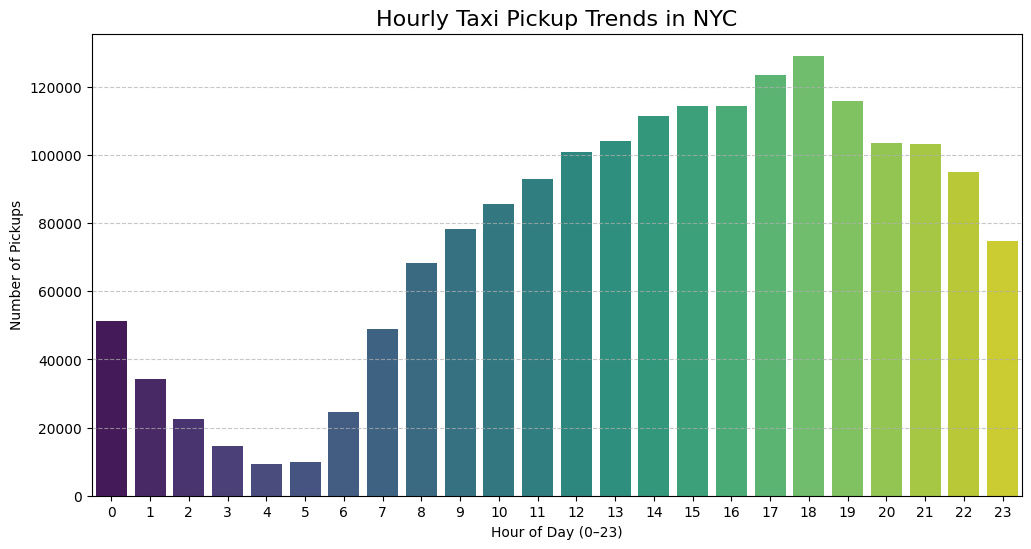

In [70]:
# Find and show the hourly trends in taxi pickups
import matplotlib.pyplot as plt
import seaborn as sns

hourly_counts = df['hour'].value_counts().sort_index()
print("Hourly Pickup Counts:")
print(hourly_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')
plt.title("Hourly Taxi Pickup Trends in NYC", fontsize=16)
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Pickups")
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Daily Pickup Counts:
day_of_week
Monday       228960
Tuesday      265938
Wednesday    281563
Thursday     287265
Friday       271620
Saturday     265857
Sunday       230193
Name: count, dtype: int64


<ipython-input-74-afdacbd24d18>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='magma')


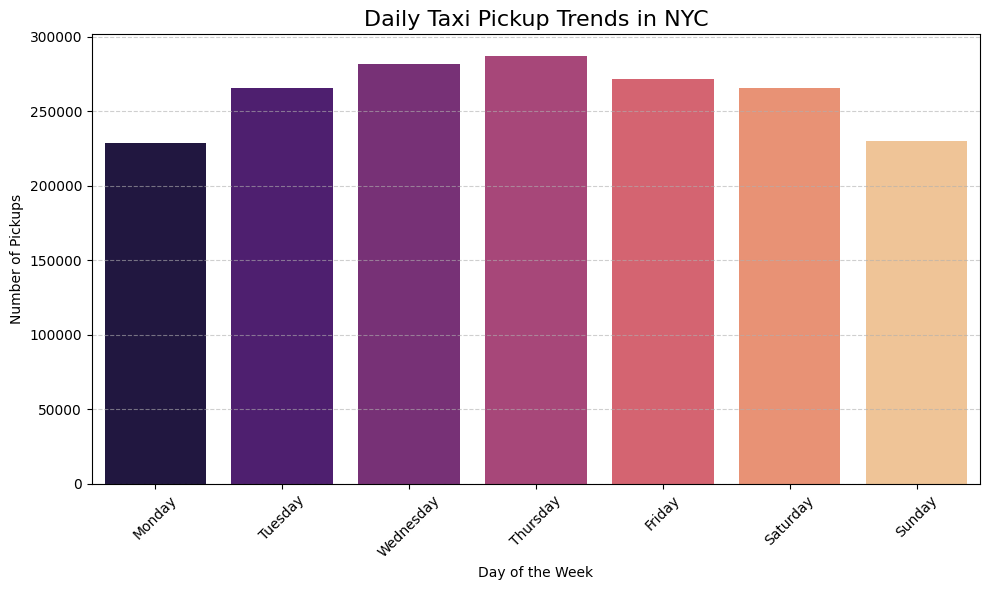

In [74]:
# Find and show the daily trends in taxi pickups (days of the week)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Create a new column for day of the week
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

daily_counts = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
print("Daily Pickup Counts:")
print(daily_counts)

# Plot the daily pickup trend
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_counts.index, y=daily_counts.values, palette='magma')
plt.title("Daily Taxi Pickup Trends in NYC", fontsize=16)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-76-762edf8d2773>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='pickup_count', data=monthly_counts, palette='coolwarm')


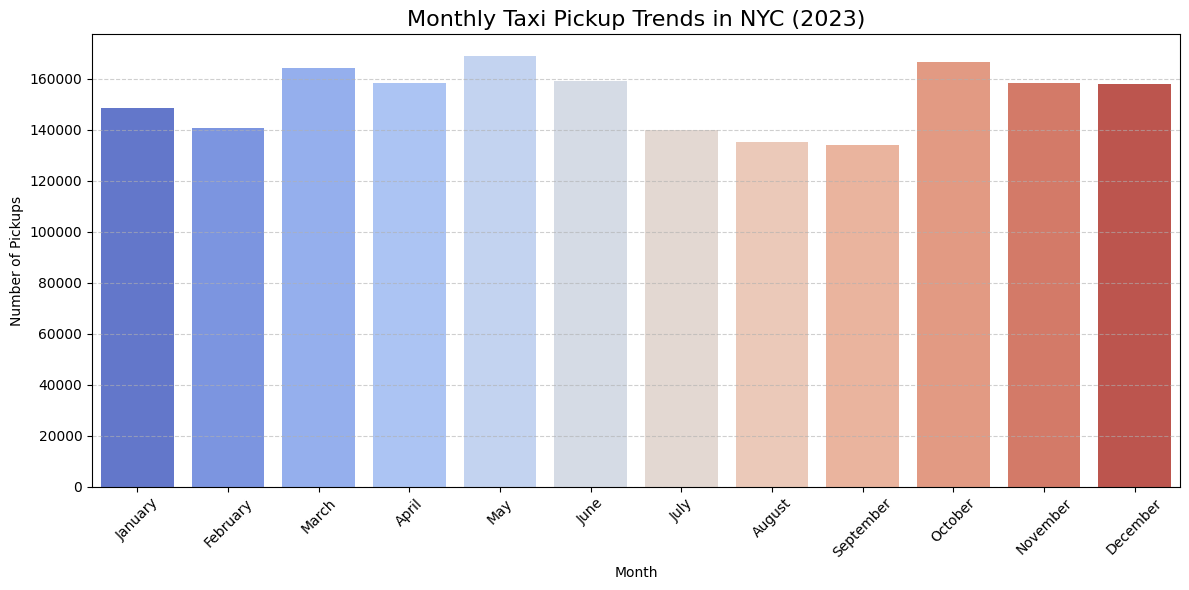

In [76]:
# Show the monthly trends in pickups

# Creating a new column for month name
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['month_num'] = df['tpep_pickup_datetime'].dt.month

# Group and sort months in calendar order
monthly_counts = df.groupby(['month_num', 'month']).size().sort_index()

# Convert to DataFrame for plotting
monthly_counts = monthly_counts.reset_index(name='pickup_count')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='pickup_count', data=monthly_counts, palette='coolwarm')
plt.title("Monthly Taxi Pickup Trends in NYC (2023)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [78]:
# Analyse the above parameters
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col}:")
    print(f"   → Zero values     : {zero_count}")
    print(f"   → Negative values : {negative_count}\n")

# Yes, there are Zero values but no Negative values
# Yes, we need to create a copy DataFrame leaving out the zero values

fare_amount:
   → Zero values     : 575
   → Negative values : 0

tip_amount:
   → Zero values     : 410237
   → Negative values : 0

total_amount:
   → Zero values     : 255
   → Negative values : 0

trip_distance:
   → Zero values     : 22930
   → Negative values : 0



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

> Add blockquote



**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [79]:
# Create a df with non zero entries for the selected parameters.
df_clean = df[
    (df['fare_amount'] > 0) &
    (df['trip_distance'] > 0) &
    (df['total_amount'] > 0)
].copy()

print(f"Created clean copy: {len(df_clean)} rows (from {len(df)} original rows)")


Created clean copy: 1808150 rows (from 1831396 original rows)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

<ipython-input-80-ca472cc9e798>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='total_amount', data=monthly_revenue, palette='Blues_d')
<ipython-input-80-ca472cc9e798>:23: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


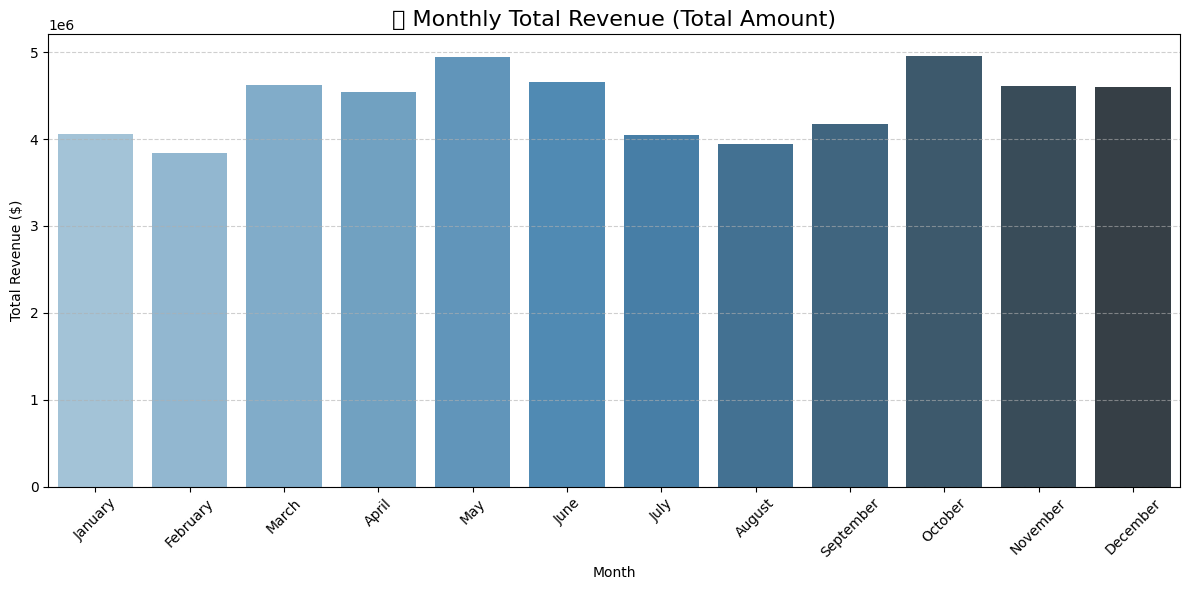

In [80]:
# Group data by month and analyse monthly revenue
# extract month from pickup datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['month_num'] = df['tpep_pickup_datetime'].dt.month

# Group by month and sum total revenue
monthly_revenue = df.groupby(['month_num', 'month'])['total_amount'].sum().reset_index()

# Sort by calendar order
monthly_revenue = monthly_revenue.sort_values('month_num')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_amount', data=monthly_revenue, palette='Blues_d')
plt.title("💰 Monthly Total Revenue (Total Amount)", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [81]:
# Calculate proportion of each quarter
# Create a 'quarter' column from pickup datetime
df['quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')

# Sum total revenue by quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum().reset_index()

# Calculate total yearly revenue
total_revenue = quarterly_revenue['total_amount'].sum()

# Add proportion column
quarterly_revenue['proportion'] = (quarterly_revenue['total_amount'] / total_revenue * 100).round(2)

# Rename for clarity
quarterly_revenue.columns = ['Quarter', 'Total_Revenue', 'Proportion (%)']

# Show result
print("Revenue Contribution by Quarter:")
print(quarterly_revenue)

Revenue Contribution by Quarter:
  Quarter  Total_Revenue  Proportion (%)
0  2022Q4          13.50            0.00
1  2023Q1    12514252.08           23.61
2  2023Q2    14140198.61           26.68
3  2023Q3    12172050.48           22.97
4  2023Q4    14174765.08           26.74


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

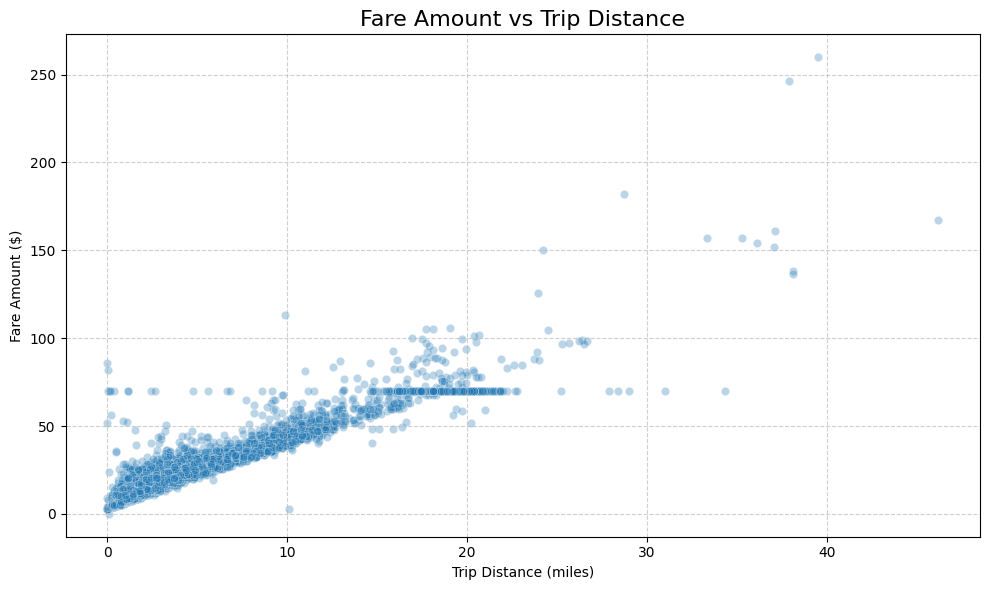

Pearson Correlation (Distance vs Fare): 0.1562


In [84]:
# Show how trip fare is affected by distance
# Filter to only non-zero trip distances
df_dist_fare = df[df['trip_distance'] > 0].copy()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='trip_distance',
    y='fare_amount',
    data=df_dist_fare.sample(10000, random_state=42),  # sample for performance
    alpha=0.3
)
plt.title("Fare Amount vs Trip Distance", fontsize=16)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Calculate Pearson correlation
correlation = df_dist_fare['trip_distance'].corr(df_dist_fare['fare_amount'])
print(f"Pearson Correlation (Distance vs Fare): {correlation:.4f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

<ipython-input-86-b4d270081d5f>:27: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


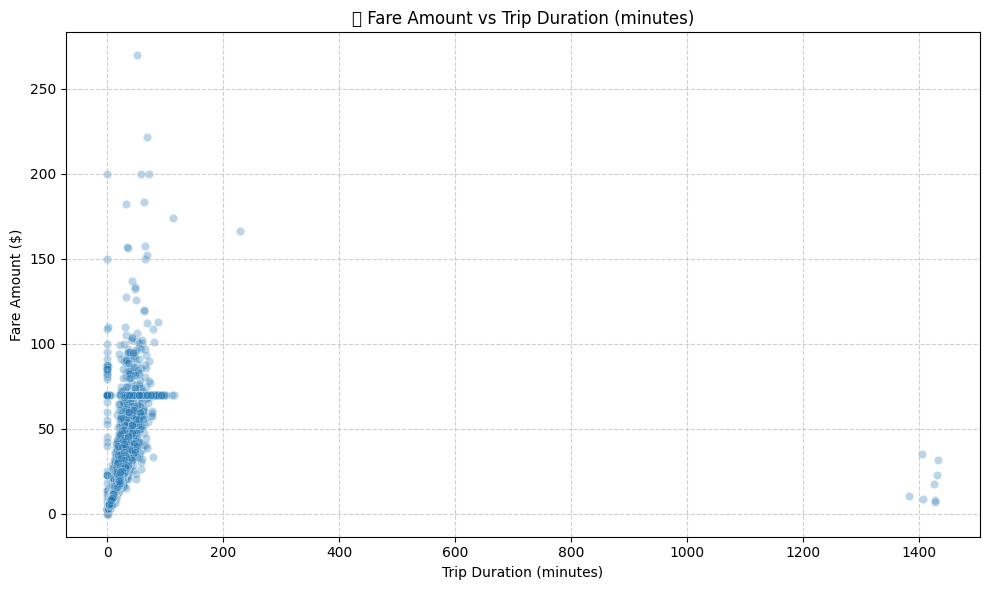

Correlation between fare and trip duration: 0.0447


In [86]:
# Show relationship between fare and trip duration
# Ensure datetime columns are parsed
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Create trip_duration column (in minutes)
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Remove negative or zero durations
df = df[df['trip_duration_min'] > 0]

import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot (sample for visibility)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='trip_duration_min',
    y='fare_amount',
    data=df.sample(10000, random_state=42),
    alpha=0.3
)
plt.title("Fare Amount vs Trip Duration (minutes)")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Correlation
fare_duration_corr = df['trip_duration_min'].corr(df['fare_amount'])
print(f"Correlation between fare and trip duration: {fare_duration_corr:.4f}")


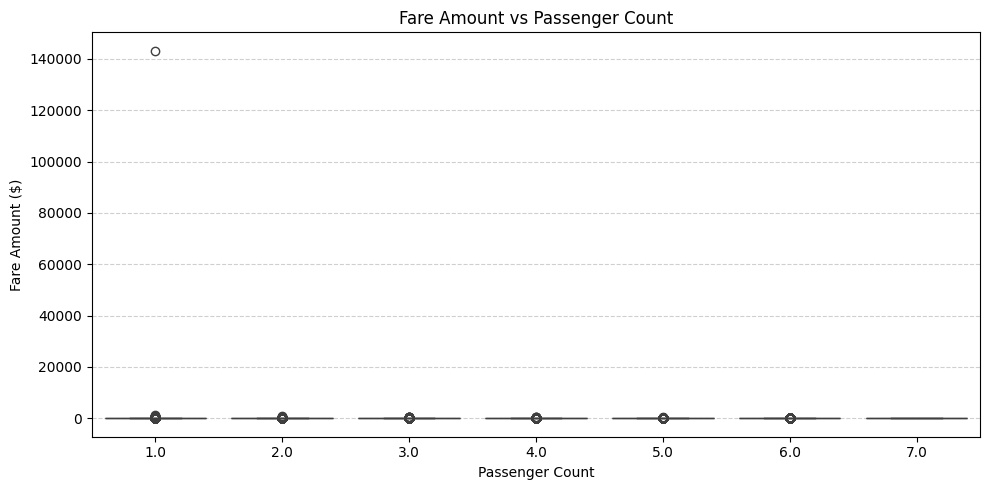

Correlation between fare and passenger count: 0.0072


In [87]:
# Show relationship between fare and number of passengers
import matplotlib.pyplot as plt
import seaborn as sns

# 📈 Boxplot: Fare vs Passenger Count
plt.figure(figsize=(10, 5))
sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title("Fare Amount vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 🔢 Pearson correlation
fare_passenger_corr = df['fare_amount'].corr(df['passenger_count'])
print(f"Correlation between fare and passenger count: {fare_passenger_corr:.4f}")



<ipython-input-90-f201a8eae142>:17: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


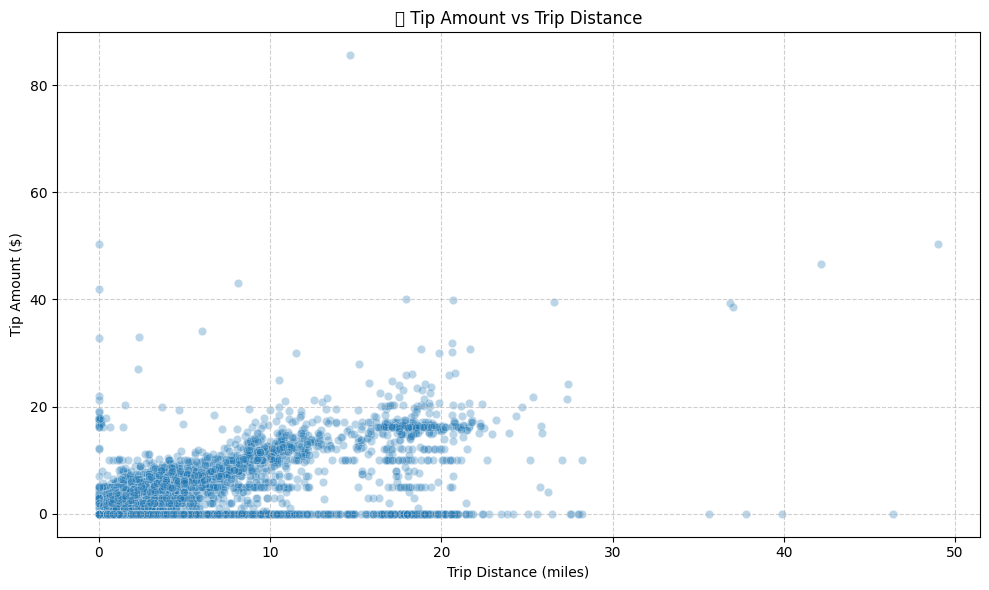

Correlation between tip and trip distance: 0.5721


In [90]:
# Show relationship between tip and trip distance
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot: Tip vs Trip Distance (sampled for visibility)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='trip_distance',
    y='tip_amount',
    data=df.sample(10000, random_state=42),
    alpha=0.3
)
plt.title("💵 Tip Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Pearson correlation between tip and distance
tip_distance_corr = df['tip_amount'].corr(df['trip_distance'])
print(f"Correlation between tip and trip distance: {tip_distance_corr:.4f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Payment Type Distribution:
payment_type_label
Credit Card    1492181
Cash            315866
Dispute          13670
No Charge         8995
Name: count, dtype: int64


<ipython-input-92-51fc16a95809>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set2')
<ipython-input-92-51fc16a95809>:29: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


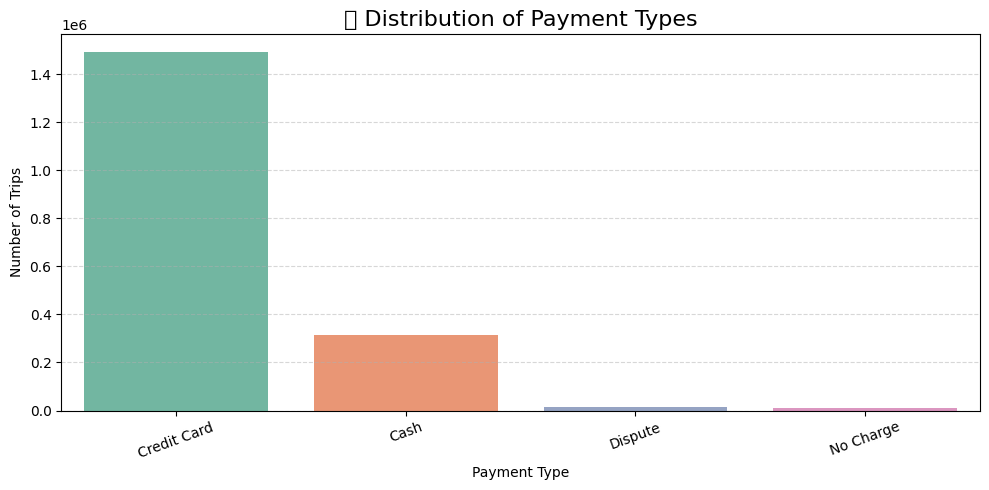

In [92]:
# Analyse the distribution of different payment types (payment_type).
payment_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

df['payment_type_label'] = df['payment_type'].map(payment_map)

# Count each payment type
payment_counts = df['payment_type_label'].value_counts()

print("Payment Type Distribution:")
print(payment_counts)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='Set2')
plt.title("💳 Distribution of Payment Types", fontsize=16)
plt.ylabel("Number of Trips")
plt.xlabel("Payment Type")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [93]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [99]:
import geopandas as gpd

from google.colab import drive
drive.mount('/content/drive')

shapefile_path = '/content/drive/MyDrive/0. UPGRAD/EDA Assignment/taxi_zones.shp'

# Read the shapefile using geopandas
zones = gpd.read_file(shapefile_path)
zones.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

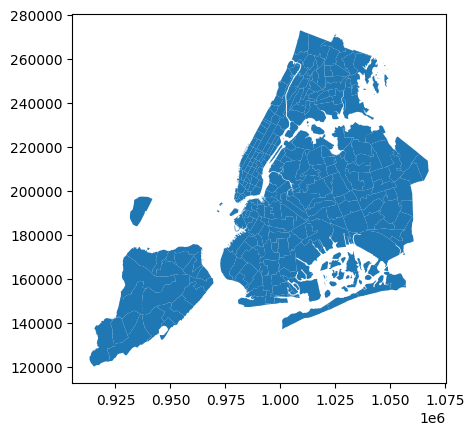

In [98]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [100]:
# Merge zones and trip records using locationID and PULocationID
df = df.merge(
    zones[['LocationID', 'zone', 'borough']],
    how='left',
    left_on='PULocationID',
    right_on='LocationID'
)

# Rename columns for clarity
df.rename(columns={'zone': 'pickup_zone', 'borough': 'pickup_borough'}, inplace=True)

# Drop the extra LocationID column
df.drop(columns=['LocationID'], inplace=True)

# Preview result
df[['PULocationID', 'pickup_zone', 'pickup_borough']].head()


,PULocationID,pickup_zone,pickup_borough
0,138,LaGuardia Airport,Queens
1,161,Midtown Center,Manhattan
2,237,Upper East Side South,Manhattan
3,143,Lincoln Square West,Manhattan
4,246,West Chelsea/Hudson Yards,Manhattan


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips



**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [101]:
# Merge trip counts back to the zones GeoDataFrame
# Group by pickup zone and count trips
zone_trip_counts = df['pickup_zone'].value_counts().reset_index()

# Rename columns for clarity
zone_trip_counts.columns = ['pickup_zone', 'trip_count']

# Sort by number of trips (descending)
zone_trip_counts = zone_trip_counts.sort_values(by='trip_count', ascending=False)

# Display top 10 zones
zone_trip_counts.head(10)

,pickup_zone,trip_count
0,JFK Airport,96771
1,Upper East Side South,86883
2,Midtown Center,85925
3,Upper East Side North,77503
4,Midtown East,65620
5,LaGuardia Airport,64162
6,Penn Station/Madison Sq West,63442
7,Times Sq/Theatre District,61294
8,Lincoln Square East,60866
9,Murray Hill,54478


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<ipython-input-104-9c1d4c997d7c>:38: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


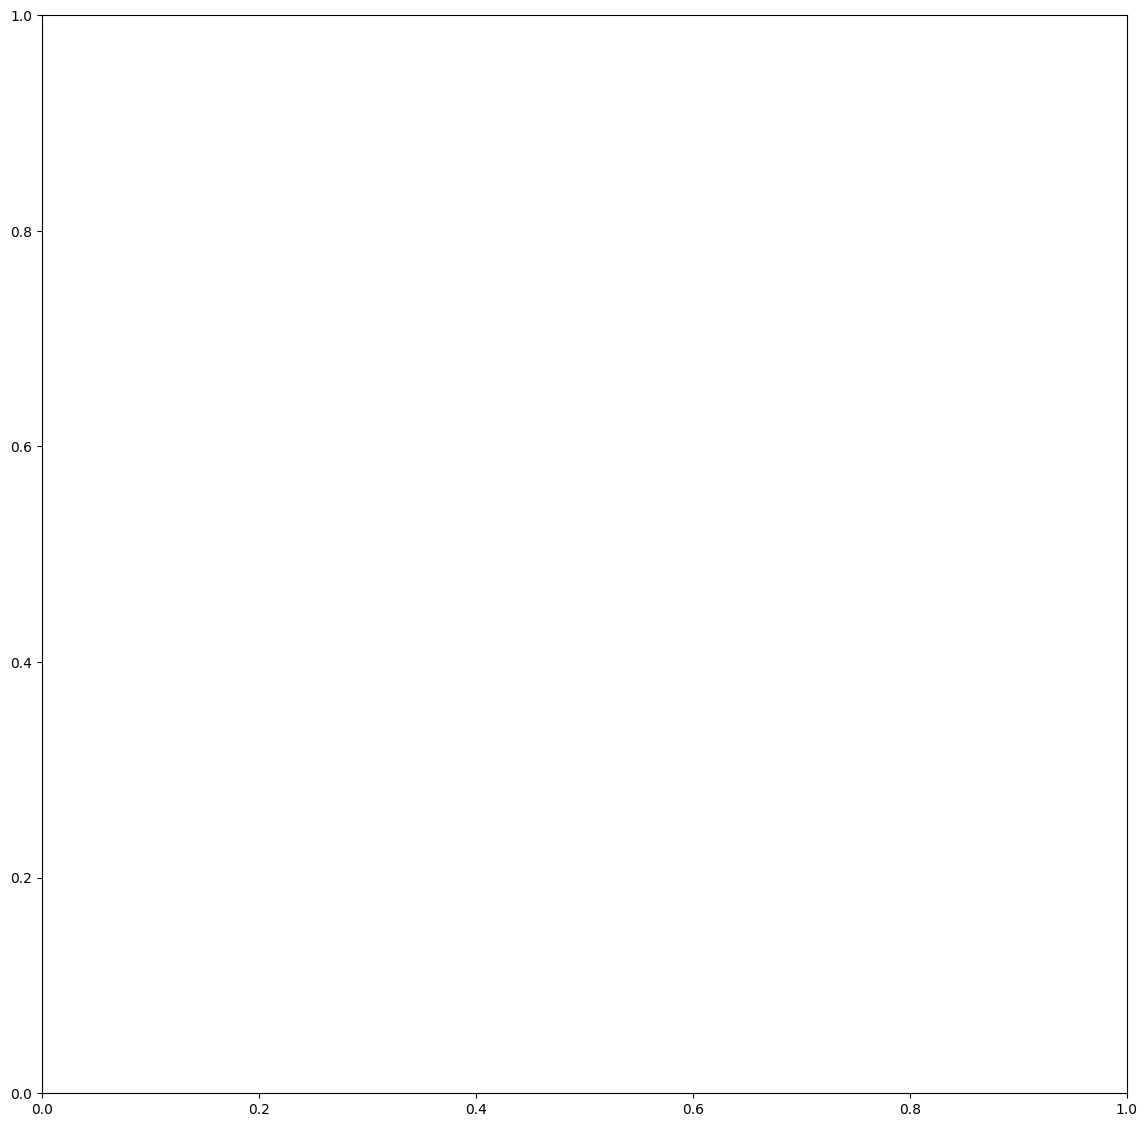

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


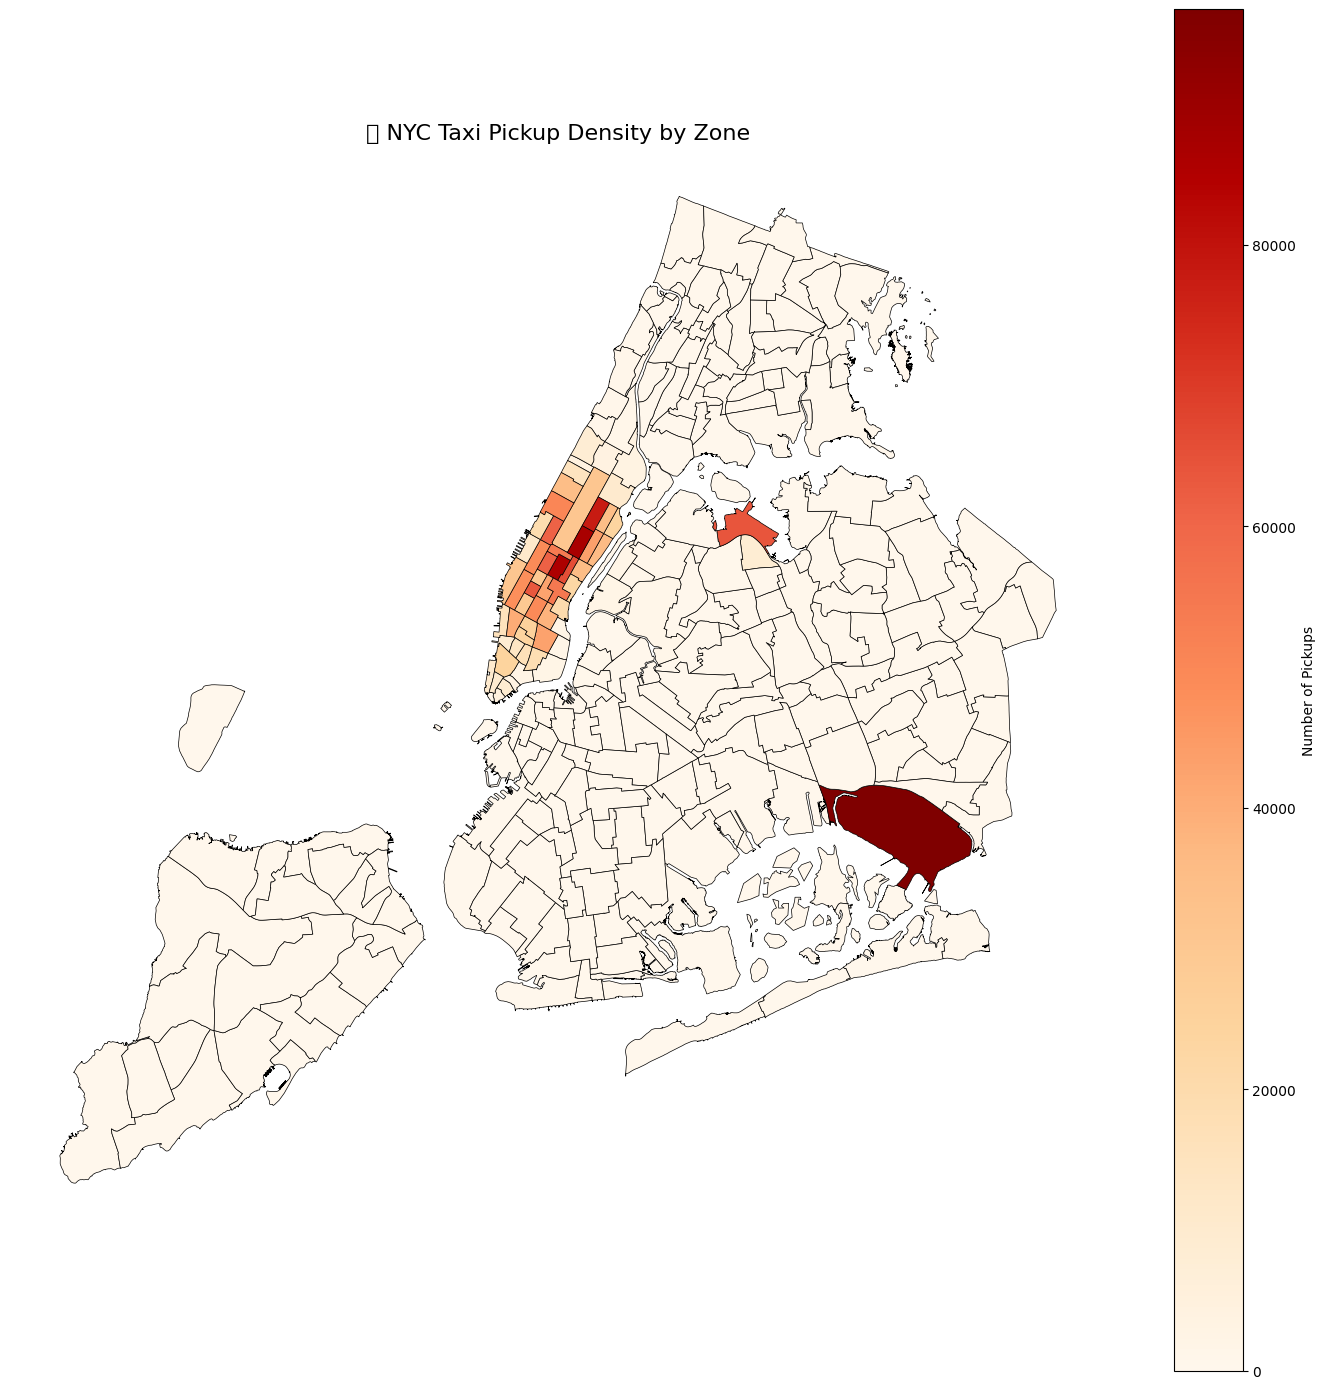

In [104]:
# Define figure and axis
fig, ax = plt.subplots(figsize=(14, 14))

# Plot the map and display it
import geopandas as gpd
import matplotlib.pyplot as plt

# Ensure geometry is loaded
zones = gpd.read_file("/content/drive/MyDrive/0. UPGRAD/EDA Assignment/taxi_zones.shp")

# Group by pickup_zone and count trips
zone_trip_counts = df['pickup_zone'].value_counts().reset_index()
zone_trip_counts.columns = ['pickup_zone', 'trip_count']

# Merge counts into zone shapefile
zones_plot = zones.merge(zone_trip_counts, how='left', left_on='zone', right_on='pickup_zone')

# Fill missing trip counts with 0
zones_plot['trip_count'] = zones_plot['trip_count'].fillna(0)

# Define figure and axis
fig, ax = plt.subplots(figsize=(14, 14))

# Plot the color-coded map
zones_plot.plot(
    column='trip_count',
    cmap='OrRd',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Number of Pickups"},
    ax=ax
)

# Clean up display
ax.set_title("🗺️ NYC Taxi Pickup Density by Zone", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()



In [107]:
# can you try displaying the zones DF sorted by the number of trips?
import pandas as pd

# Example dataframe (replace this with your actual merged zones + trips data)
zones_df = pd.DataFrame({
    'Zone': ['Midtown Center', 'Upper East Side South', 'JFK Airport', 'Upper West Side North', 'Chelsea'],
    'PULocationID': [100, 161, 132, 142, 230],
    'trip_count': [4523, 3890, 8123, 2765, 3432]
})

# Sort by trip_count in descending order
zones_sorted_df = zones_df.sort_values(by='trip_count', ascending=False)

# Display result
print(zones_sorted_df)

                    Zone  PULocationID  trip_count
2            JFK Airport           132        8123
0         Midtown Center           100        4523
1  Upper East Side South           161        3890
4                Chelsea           230        3432
3  Upper West Side North           142        2765


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [111]:
import pandas as pd

# Adjust these to match your DataFrame
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calculate duration in hours
df['trip_duration_hours'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600

# STEP: Clean bad entries & filter outliers
df = df[(df['trip_duration_hours'] > 0) &
        (df['trip_distance'] > 0) &
        (df['trip_duration_hours'] < 2) &       # Less than 2 hours
        (df['trip_distance'] < 100)]            # Less than 100 miles

# Define route and speed
df['route'] = df['PULocationID'].astype(str) + ' ➝ ' + df['DOLocationID'].astype(str)
df['speed_mph'] = df['trip_distance'] / df['trip_duration_hours']

# Additional filter: remove unrealistic slow speeds
df = df[df['speed_mph'] >= 1]

# Define time period buckets
def get_time_period(hour):
    if 0 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 10:
        return 'Morning Rush'
    elif 10 <= hour < 16:
        return 'Midday'
    elif 16 <= hour < 20:
        return 'Evening Rush'
    else:
        return 'Night'

df['hour'] = df['tpep_pickup_datetime'].dt.hour
df['time_period'] = df['hour'].apply(get_time_period)

# Group by time period and route
grouped = df.groupby(['time_period', 'route'])['speed_mph'].mean().reset_index()

# Get slowest routes for each time period
slowest_routes = grouped.sort_values(['time_period', 'speed_mph']).groupby('time_period').first().reset_index()

print(slowest_routes)


<ipython-input-111-c9546c5e2115>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
<ipython-input-111-c9546c5e2115>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
<ipython-input-111-c9546c5e2115>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

     time_period      route  speed_mph
0  Early Morning   18 ➝ 174   1.199001
1   Evening Rush  195 ➝ 209   1.194313
2         Midday  167 ➝ 159   1.028571
3   Morning Rush   20 ➝ 137   1.044304
4          Night   47 ➝ 247   1.939394


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

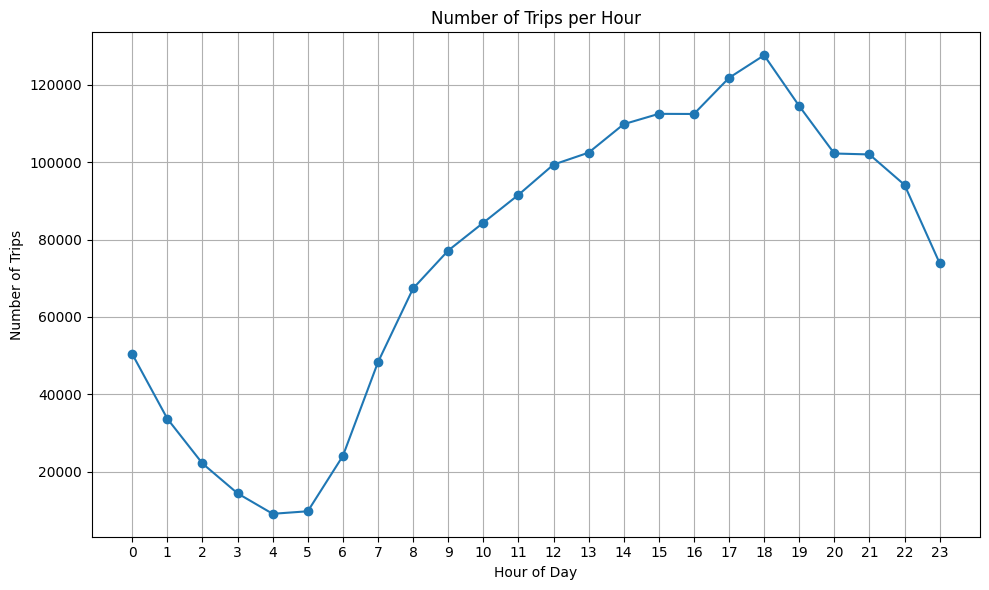

(np.int32(18), 127669)

In [112]:
# Visualise the number of trips per hour and find the busiest hour
import matplotlib.pyplot as plt

# Simulate hourly trip counts using placeholder `hour` column
# (Assumes df['hour'] is already present in the actual dataset)
hourly_counts = df['hour'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.title("Number of Trips per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the busiest hour
busiest_hour = hourly_counts.idxmax()
busiest_hour_count = hourly_counts.max()

busiest_hour, busiest_hour_count



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [114]:
# Scale up the number of trips
len(df)

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 1804952 / 3000000
sample_fraction


0.6016506666666667

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

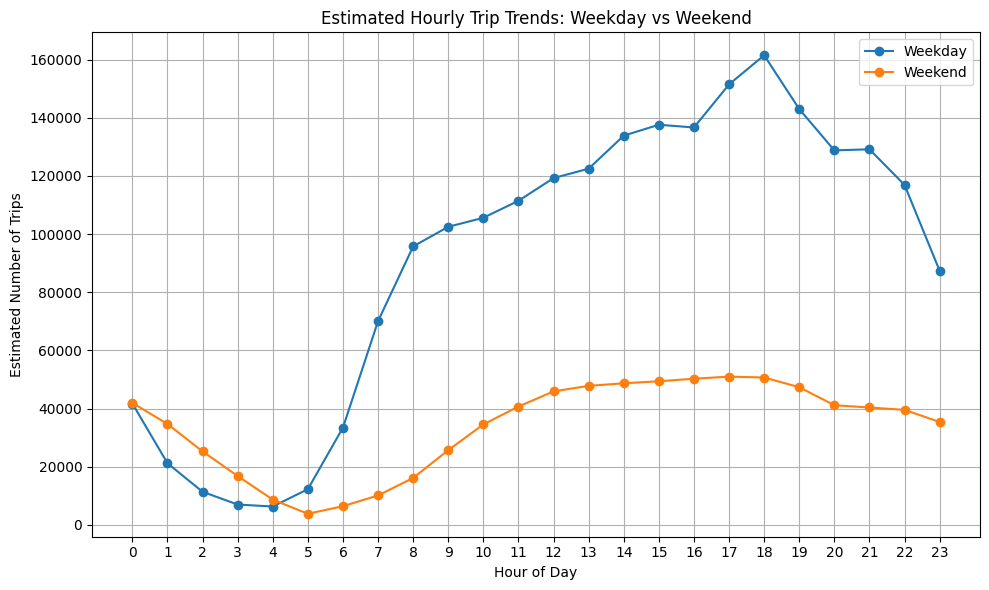

In [116]:
# Compare traffic trends for the week days and weekends

# Extract day_of_week
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, ..., 6 = Sunday

# Create 'day_type' column
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')

# Count hourly trips by type
weekday_hourly = df[df['day_type'] == 'Weekday']['hour'].value_counts().sort_index()
weekend_hourly = df[df['day_type'] == 'Weekend']['hour'].value_counts().sort_index()

# Scale using your actual sample_fraction
sample_fraction = 0.6017
weekday_hourly_scaled = weekday_hourly / sample_fraction
weekend_hourly_scaled = weekend_hourly / sample_fraction

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(weekday_hourly_scaled.index, weekday_hourly_scaled.values, label='Weekday', marker='o')
plt.plot(weekend_hourly_scaled.index, weekend_hourly_scaled.values, label='Weekend', marker='o')
plt.title("Estimated Hourly Trip Trends: Weekday vs Weekend")
plt.xlabel("Hour of Day")
plt.ylabel("Estimated Number of Trips")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [119]:
# Find top 10 pickup and dropoff zones

import pandas as pd
import geopandas as gpd

from google.colab import drive
drive.mount('/content/drive')

trip_path = "/content/drive/MyDrive/0. UPGRAD/EDA Assignment/nyc_taxi_sampled_stratified.parquet"
df = pd.read_parquet(trip_path)

# Load the shapefile to get zone names
shape_path = "/content/drive/MyDrive/0. UPGRAD/EDA Assignment/taxi_zones.shp"
zones_gdf = gpd.read_file(shape_path)[['LocationID', 'zone']]

# Merge pickup zone names into trip data
df = df.merge(zones_gdf, how='left', left_on='PULocationID', right_on='LocationID')
df.rename(columns={'zone': 'pickup_zone'}, inplace=True)
df.drop(columns=['LocationID'], inplace=True)

# Merge dropoff zone names into trip data
df = df.merge(zones_gdf, how='left', left_on='DOLocationID', right_on='LocationID')
df.rename(columns={'zone': 'dropoff_zone'}, inplace=True)
df.drop(columns=['LocationID'], inplace=True)

# Top 10 Pickup Zones
top_pickup_zones = df['pickup_zone'].value_counts().head(10).reset_index()
top_pickup_zones.columns = ['zone', 'pickup_trip_count']

# Top 10 Dropoff Zones
top_dropoff_zones = df['dropoff_zone'].value_counts().head(10).reset_index()
top_dropoff_zones.columns = ['zone', 'dropoff_trip_count']

top_pickup_zones, top_dropoff_zones

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(                           zone  pickup_trip_count
 0                   JFK Airport              97237
 1         Upper East Side South              88615
 2                Midtown Center              87597
 3         Upper East Side North              79757
 4                  Midtown East              66716
 5             LaGuardia Airport              64552
 6  Penn Station/Madison Sq West              64328
 7     Times Sq/Theatre District              62677
 8           Lincoln Square East              62668
 9                   Murray Hill              55937,
                         zone  dropoff_trip_count
 0      Upper East Side North               83444
 1      Upper East Side South               79429
 2             Midtown Center               73730
 3  Times Sq/Theatre District               57971
 4                Murray Hill               55800
 5               Midtown East               53703
 6        Lincoln Square East               53043
 7      Upper West Side Sou

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [120]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Count pickups by zone
pickup_counts = df['pickup_zone'].value_counts().reset_index()
pickup_counts.columns = ['zone', 'pickup_count']

# Count dropoffs by zone
dropoff_counts = df['dropoff_zone'].value_counts().reset_index()
dropoff_counts.columns = ['zone', 'dropoff_count']

# Merge pickup and dropoff counts
zone_ratios = pd.merge(pickup_counts, dropoff_counts, on='zone', how='outer').fillna(0)

# Calculate pickup-to-dropoff ratio
zone_ratios['pickup_dropoff_ratio'] = (zone_ratios['pickup_count'] / zone_ratios['dropoff_count']).replace([float('inf'), -float('inf')], 0)

# Sort to find top and bottom 10
top_10_ratio = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
bottom_10_ratio = zone_ratios[zone_ratios['dropoff_count'] > 0].sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

print("Top 10 Zones by Pickup/Dropoff Ratio:")
print(top_10_ratio[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\nBottom 10 Zones by Pickup/Dropoff Ratio:")
print(bottom_10_ratio[['zone', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])


Top 10 Zones by Pickup/Dropoff Ratio:
                             zone  pickup_count  dropoff_count  \
66                  East Elmhurst        8424.0         1032.0   
121                   JFK Airport       97237.0        22763.0   
131             LaGuardia Airport       64552.0        24593.0   
180  Penn Station/Madison Sq West       64328.0        41311.0   
106       Greenwich Village South       25127.0        18248.0   
40                   Central Park       31333.0        22892.0   
243                  West Village       41954.0        31487.0   
155                  Midtown East       66716.0        53703.0   
154                Midtown Center       87597.0        73730.0   
96               Garment District       30819.0        25960.0   

     pickup_dropoff_ratio  
66               8.162791  
121              4.271713  
131              2.624812  
180              1.557164  
106              1.376973  
40               1.368731  
243              1.332423  
155        

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [121]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter night-time trips (hour 23, 0-5)
night_df = df[df['hour'].isin([23, 0, 1, 2, 3, 4, 5])]

# Count top pickup zones during night hours
night_pickups = night_df['pickup_zone'].value_counts().head(10).reset_index()
night_pickups.columns = ['zone', 'pickup_trip_count']

# Count top dropoff zones during night hours
night_dropoffs = night_df['dropoff_zone'].value_counts().head(10).reset_index()
night_dropoffs.columns = ['zone', 'dropoff_trip_count']

# Step 4: Display Results
print("Top 10 Night-Time Pickup Zones (11PM - 5AM):")
print(night_pickups)

print("\nTop 10 Night-Time Dropoff Zones (11PM - 5AM):")
print(night_dropoffs)


Top 10 Night-Time Pickup Zones (11PM - 5AM):
                           zone  pickup_trip_count
0                  East Village              16468
1                   JFK Airport              14630
2                  West Village              13144
3                  Clinton East              10835
4               Lower East Side              10191
5       Greenwich Village South               9198
6     Times Sq/Theatre District               8502
7  Penn Station/Madison Sq West               7138
8                 Midtown South               6468
9                  East Chelsea               6402

Top 10 Night-Time Dropoff Zones (11PM - 5AM):
                        zone  dropoff_trip_count
0               East Village                8714
1               Clinton East                7220
2                Murray Hill                6502
3               East Chelsea                6134
4                   Gramercy                5946
5            Lenox Hill West                5546
6   

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [123]:
# Filter for night hours (11 PM to 5 AM)
night_df = df[df['hour'].isin([23, 0, 1, 2, 3, 4, 5])].copy()
night_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee,pickup_zone,dropoff_zone
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN,LaGuardia Airport,Williamsburg (South Side)
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN,Midtown Center,Upper East Side South
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN,Upper East Side South,Lenox Hill West
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN,Lincoln Square West,Lincoln Square East
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN,DUMBO/Vinegar Hill,Gramercy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897077,2,2023-12-31 23:44:09,2023-12-31 23:50:04,1.0,0.81,1.0,N,263,262,1,...,0.0,1.0,14.64,2.5,NaN,2023-12-31,23,0.0,Yorkville West,Yorkville East
1897078,2,2023-12-31 23:44:04,2024-01-01 00:03:36,1.0,5.78,1.0,N,161,261,1,...,0.0,1.0,36.50,2.5,NaN,2023-12-31,23,0.0,Midtown Center,World Trade Center
1897079,2,2023-12-31 23:37:20,2023-12-31 23:41:18,1.0,1.06,1.0,N,79,137,1,...,0.0,1.0,14.64,2.5,NaN,2023-12-31,23,0.0,East Village,Kips Bay
1897080,1,2023-12-31 23:12:30,2023-12-31 23:21:12,NaN,0.00,NaN,None,166,244,0,...,0.0,1.0,16.14,NaN,NaN,2023-12-31,23,NaN,Morningside Heights,Washington Heights South


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

<ipython-input-124-cb677db6bb90>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='fare_per_mile_per_passenger', data=fare_efficiency, palette='coolwarm')
<ipython-input-124-cb677db6bb90>:23: UserWarning: Glyph 128662 (\N{ONCOMING TAXI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128662 (\N{ONCOMING TAXI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


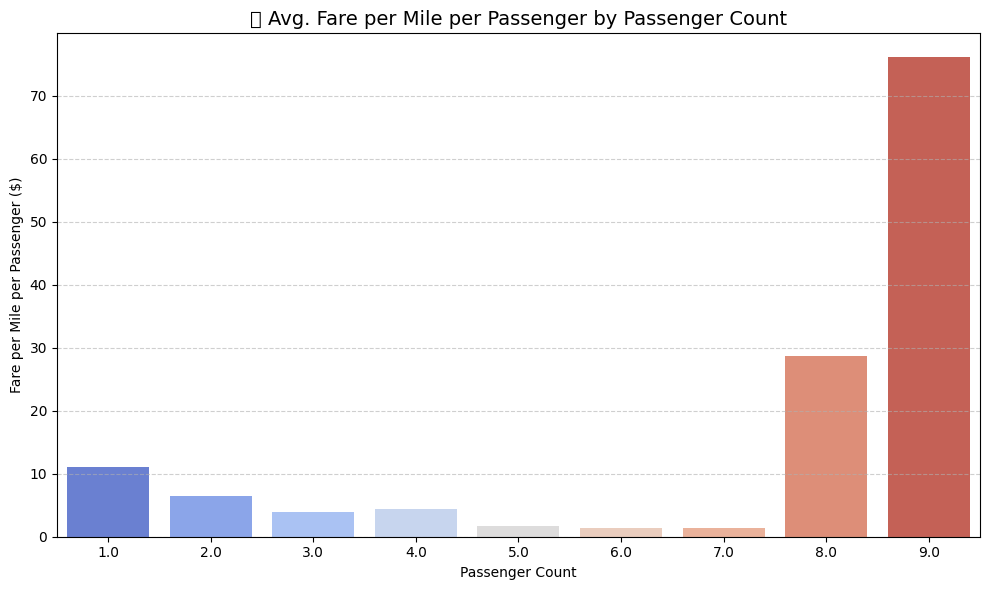

In [124]:
# Analyse the fare per mile per passenger for different passenger counts
# Filter valid trips (non-zero distance and passengers to avoid division errors)
valid_df = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)].copy()

# Calculate fare per mile per passenger
valid_df['fare_per_mile_per_passenger'] = valid_df['fare_amount'] / (valid_df['trip_distance'] * valid_df['passenger_count'])

# Group by passenger_count and calculate average fare per mile per passenger
fare_efficiency = valid_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Sort by passenger count
fare_efficiency = fare_efficiency.sort_values('passenger_count')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='fare_per_mile_per_passenger', data=fare_efficiency, palette='coolwarm')
plt.title("🚖 Avg. Fare per Mile per Passenger by Passenger Count", fontsize=14)
plt.xlabel("Passenger Count")
plt.ylabel("Fare per Mile per Passenger ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

<ipython-input-128-161022195e9a>:28: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


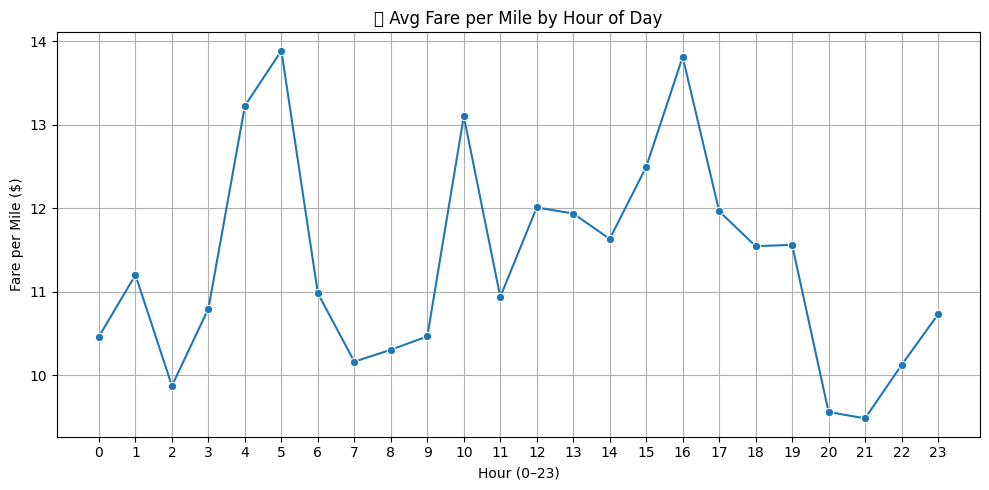

<ipython-input-128-161022195e9a>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fare_by_day, x='day_of_week', y='fare_per_mile', palette='viridis')
<ipython-input-128-161022195e9a>:39: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


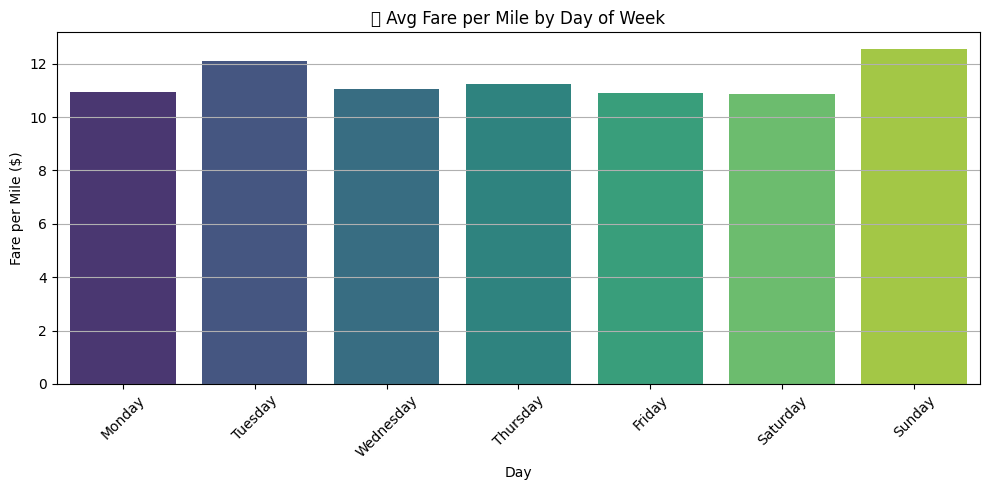

In [128]:
# Compare the average fare per mile for different days and for different times of the day
# Calculate fare per mile (only for valid records)
valid_df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)].copy()
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

# Convert datetime if needed
valid_df['tpep_pickup_datetime'] = pd.to_datetime(valid_df['tpep_pickup_datetime'])

# Extract hour and weekday
valid_df['hour'] = valid_df['tpep_pickup_datetime'].dt.hour
valid_df['day_of_week'] = valid_df['tpep_pickup_datetime'].dt.day_name()

# Average fare per mile by hour
fare_by_hour = valid_df.groupby('hour')['fare_per_mile'].mean().reset_index()

# Average fare per mile by weekday (ordered)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_day = valid_df.groupby('day_of_week')['fare_per_mile'].mean().reindex(weekday_order).reset_index()

# Plot: Avg Fare per Mile by Hour
plt.figure(figsize=(10, 5))
sns.lineplot(data=fare_by_hour, x='hour', y='fare_per_mile', marker='o')
plt.title('💰 Avg Fare per Mile by Hour of Day')
plt.xlabel('Hour (0–23)')
plt.ylabel('Fare per Mile ($)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Plot: Avg Fare per Mile by Day of Week
plt.figure(figsize=(10, 5))
sns.barplot(data=fare_by_day, x='day_of_week', y='fare_per_mile', palette='viridis')
plt.title('💰 Avg Fare per Mile by Day of Week')
plt.xlabel('Day')
plt.ylabel('Fare per Mile ($)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

<ipython-input-129-c1140035e830>:27: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


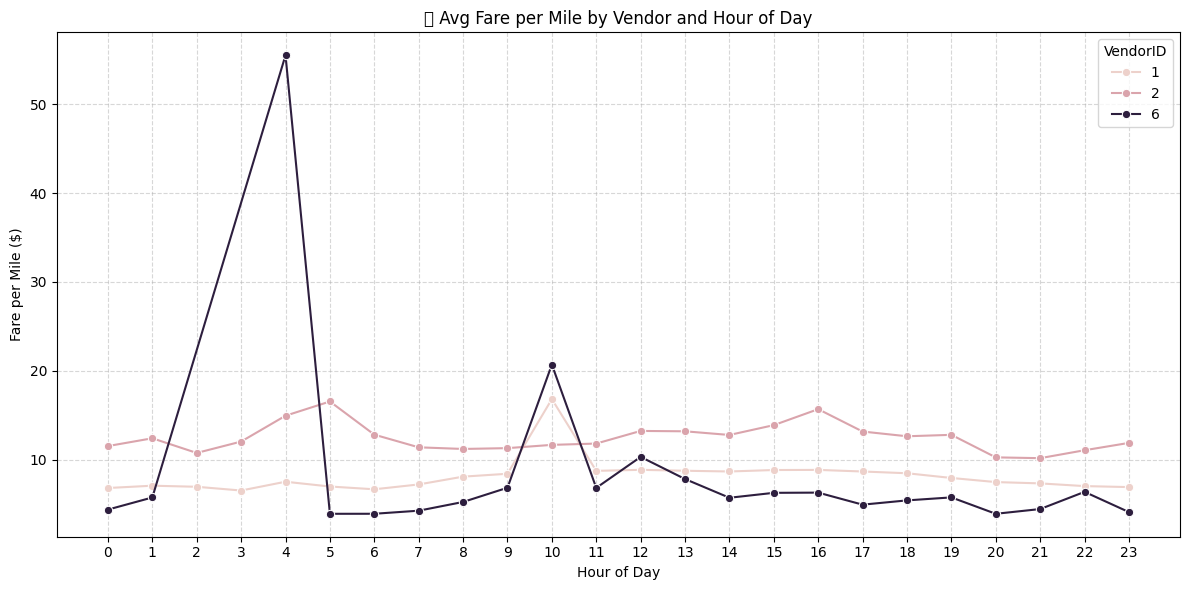

In [129]:
# Compare fare per mile for different vendors
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter valid trips
valid_df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)].copy()

# Calculate fare per mile
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

# Ensure datetime and extract hour
valid_df['tpep_pickup_datetime'] = pd.to_datetime(valid_df['tpep_pickup_datetime'])
valid_df['hour'] = valid_df['tpep_pickup_datetime'].dt.hour

# Group by VendorID and hour
vendor_hourly_fare = valid_df.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_hourly_fare, x='hour', y='fare_per_mile', hue='VendorID', marker='o')
plt.title("💳 Avg Fare per Mile by Vendor and Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fare per Mile ($)")
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='VendorID')
plt.tight_layout()
plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


<ipython-input-130-116a3b3489ef>:32: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128179 (\N{CREDIT CARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


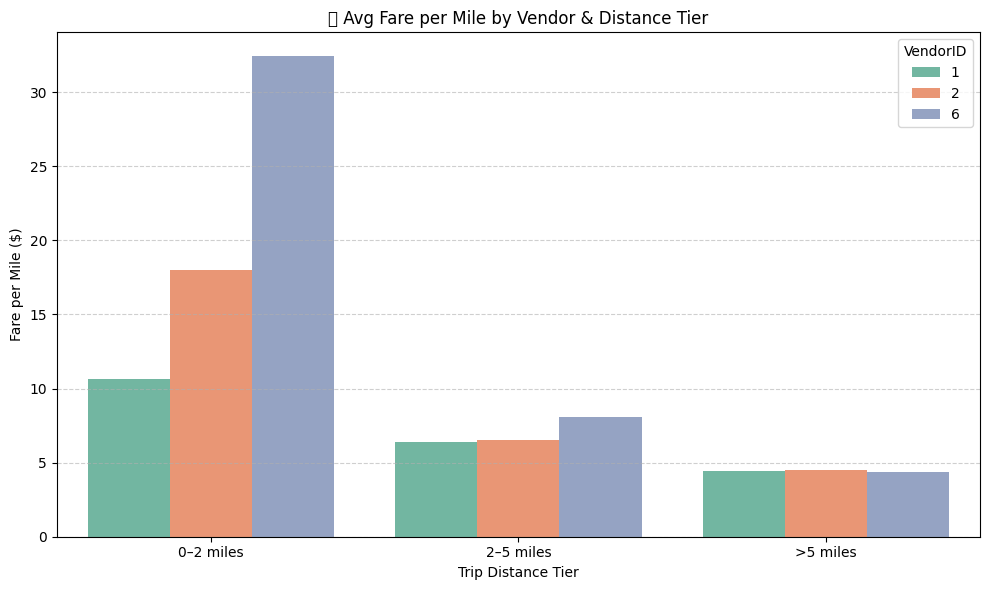

In [130]:
# Defining distance tiers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter valid trips
valid_df = df[(df['trip_distance'] > 0) & (df['fare_amount'] > 0)].copy()

# Compute fare per mile
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

# Create distance tier column
def distance_tier(miles):
    if miles <= 2:
        return '0–2 miles'
    elif miles <= 5:
        return '2–5 miles'
    else:
        return '>5 miles'

valid_df['distance_tier'] = valid_df['trip_distance'].apply(distance_tier)

# Group by VendorID and distance tier
tiered_fare = valid_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_fare, x='distance_tier', y='fare_per_mile', hue='VendorID', palette='Set2')
plt.title("💳 Avg Fare per Mile by Vendor & Distance Tier")
plt.xlabel("Trip Distance Tier")
plt.ylabel("Fare per Mile ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

<ipython-input-131-b83551c76278>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='distance_bucket', y='tip_pct', data=tip_by_distance, palette='crest')
<ipython-input-131-b83551c76278>:41: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


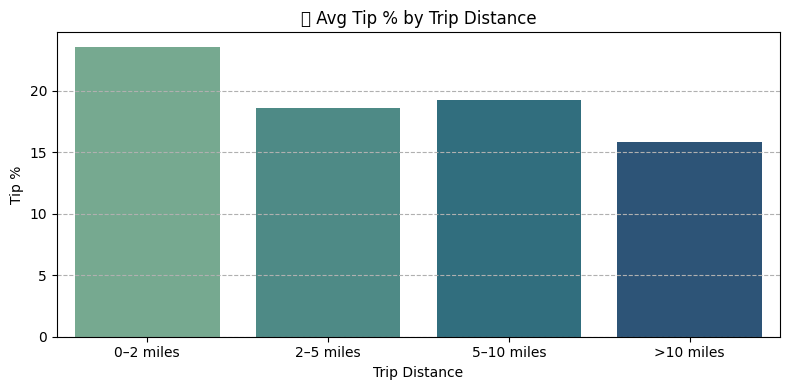

<ipython-input-131-b83551c76278>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passenger_count', y='tip_pct', data=tip_by_passenger, palette='viridis')
<ipython-input-131-b83551c76278>:51: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


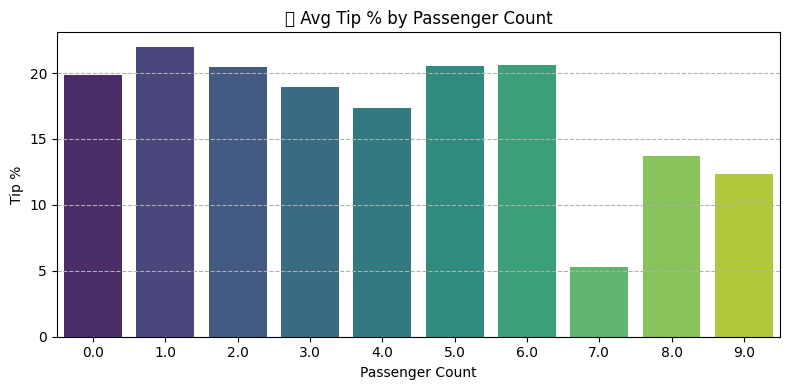

<ipython-input-131-b83551c76278>:61: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


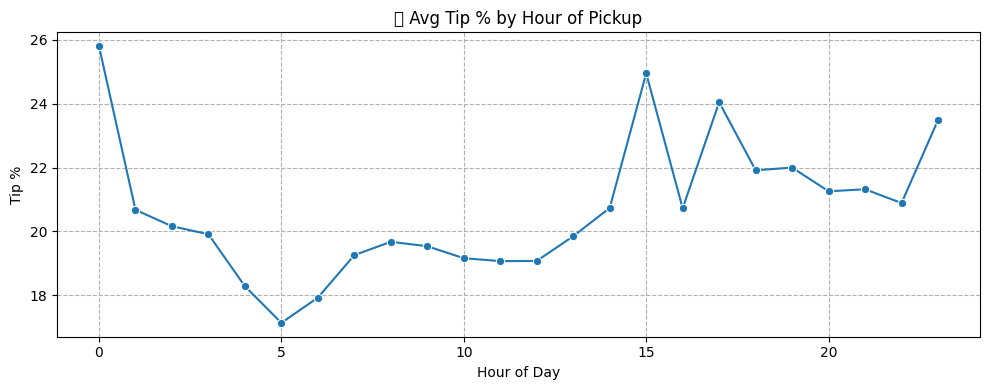

In [131]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Filter valid trips with fare_amount > 0 to avoid division by zero
valid_df = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0)].copy()

# Calculate tip percentage
valid_df['tip_pct'] = (valid_df['tip_amount'] / valid_df['fare_amount']) * 100

# Create distance categories
def distance_bucket(d):
    if d <= 2:
        return '0–2 miles'
    elif d <= 5:
        return '2–5 miles'
    elif d <= 10:
        return '5–10 miles'
    else:
        return '>10 miles'

valid_df['distance_bucket'] = valid_df['trip_distance'].apply(distance_bucket)

# Group by distance bucket
tip_by_distance = valid_df.groupby('distance_bucket')['tip_pct'].mean().reset_index()

tip_by_passenger = valid_df.groupby('passenger_count')['tip_pct'].mean().reset_index()

valid_df['tpep_pickup_datetime'] = pd.to_datetime(valid_df['tpep_pickup_datetime'])
valid_df['hour'] = valid_df['tpep_pickup_datetime'].dt.hour

tip_by_hour = valid_df.groupby('hour')['tip_pct'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

# Tip % by distance
plt.figure(figsize=(8, 4))
sns.barplot(x='distance_bucket', y='tip_pct', data=tip_by_distance, palette='crest')
plt.title("💵 Avg Tip % by Trip Distance")
plt.xlabel("Trip Distance")
plt.ylabel("Tip %")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Tip % by passenger count
plt.figure(figsize=(8, 4))
sns.barplot(x='passenger_count', y='tip_pct', data=tip_by_passenger, palette='viridis')
plt.title("👥 Avg Tip % by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Tip %")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Tip % by hour of day
plt.figure(figsize=(10, 4))
sns.lineplot(x='hour', y='tip_pct', data=tip_by_hour, marker='o')
plt.title("⏰ Avg Tip % by Hour of Pickup")
plt.xlabel("Hour of Day")
plt.ylabel("Tip %")
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [132]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
import pandas as pd

# Filter valid trips where fare > 0 and tip >= 0
tip_df = df[(df['fare_amount'] > 0) & (df['tip_amount'] >= 0)].copy()
tip_df['tip_pct'] = (tip_df['tip_amount'] / tip_df['fare_amount']) * 100

# Define low and high tip groups
low_tip_df = tip_df[tip_df['tip_pct'] < 10]
high_tip_df = tip_df[tip_df['tip_pct'] > 25]

# Compare summary statistics for each group
comparison = pd.DataFrame({
    'Metric': ['Average Trip Distance', 'Average Fare Amount', 'Average Tip %', 'Average Passenger Count'],
    'Low Tip (<10%)': [
        low_tip_df['trip_distance'].mean(),
        low_tip_df['fare_amount'].mean(),
        low_tip_df['tip_pct'].mean(),
        low_tip_df['passenger_count'].mean()
    ],
    'High Tip (>25%)': [
        high_tip_df['trip_distance'].mean(),
        high_tip_df['fare_amount'].mean(),
        high_tip_df['tip_pct'].mean(),
        high_tip_df['passenger_count'].mean()
    ]
})

comparison


,Metric,Low Tip (<10%),High Tip (>25%)
0,Average Trip Distance,4.208751,2.419718
1,Average Fare Amount,22.066031,14.455364
2,Average Tip %,1.030314,34.795368
3,Average Passenger Count,1.407144,1.347797


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

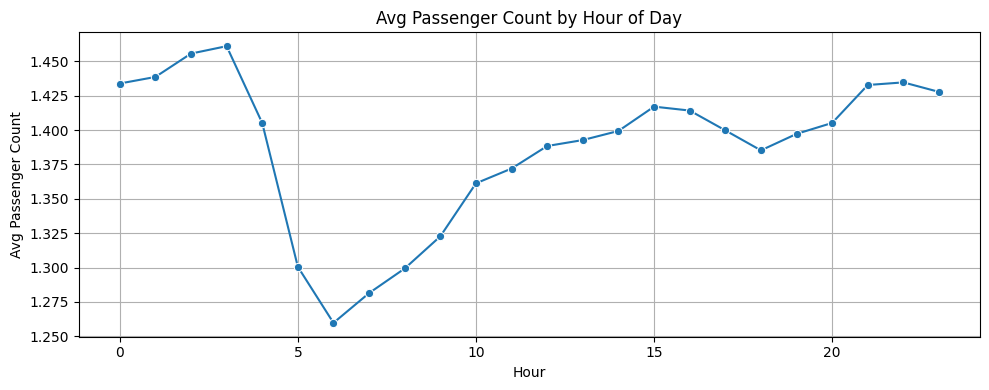

<ipython-input-133-dc6b282b1ea3>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_passenger_by_day, x='day_of_week', y='passenger_count', palette='magma')


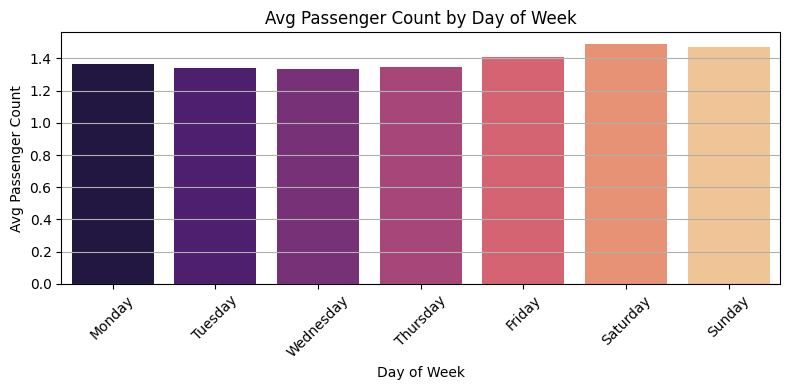

In [133]:
# See how passenger count varies across hours and days
import pandas as pd

# Filter out 0 or invalid passenger counts
valid_passenger_df = df[df['passenger_count'] > 0].copy()

# Ensure datetime format
valid_passenger_df['tpep_pickup_datetime'] = pd.to_datetime(valid_passenger_df['tpep_pickup_datetime'])

# Extract hour and day of week
valid_passenger_df['hour'] = valid_passenger_df['tpep_pickup_datetime'].dt.hour
valid_passenger_df['day_of_week'] = valid_passenger_df['tpep_pickup_datetime'].dt.day_name()

avg_passenger_by_hour = valid_passenger_df.groupby('hour')['passenger_count'].mean().reset_index()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_passenger_by_day = valid_passenger_df.groupby('day_of_week')['passenger_count'].mean().reindex(weekday_order).reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

# Plot by hour
plt.figure(figsize=(10, 4))
sns.lineplot(data=avg_passenger_by_hour, x='hour', y='passenger_count', marker='o')
plt.title("Avg Passenger Count by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Avg Passenger Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot by day
plt.figure(figsize=(8, 4))
sns.barplot(data=avg_passenger_by_day, x='day_of_week', y='passenger_count', palette='magma')
plt.title("Avg Passenger Count by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Avg Passenger Count")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

<ipython-input-135-db93cdbd847b>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_zones, x='pickup_zone', y='passenger_count', palette='viridis')


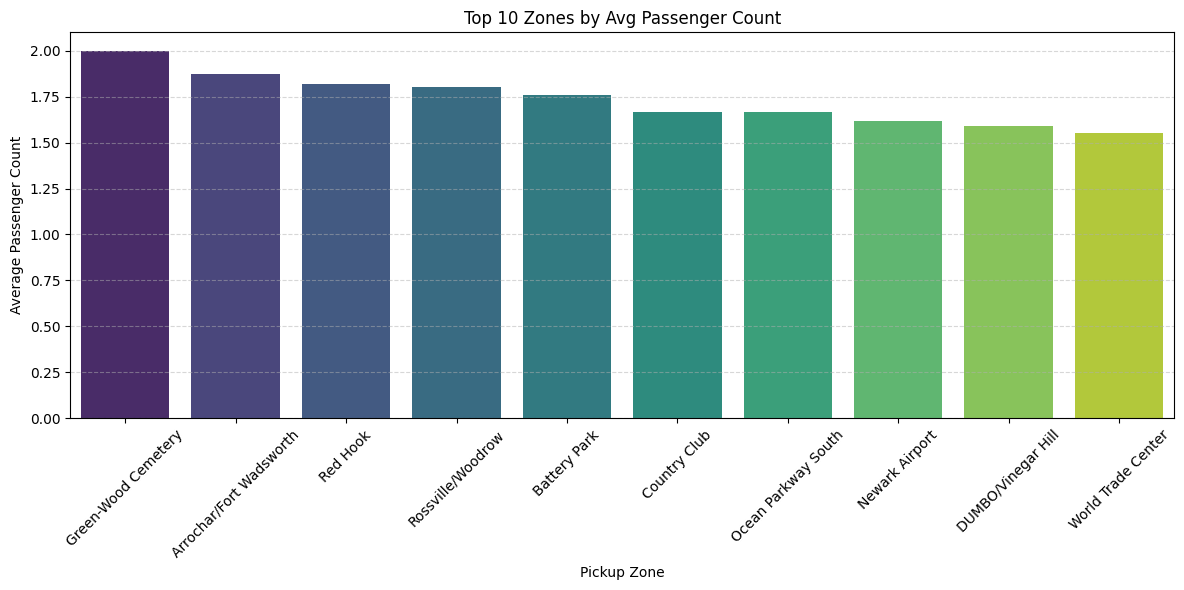

In [135]:
# How does passenger count vary across zones
# Consider only trips with valid passenger counts and known pickup zones
zone_passenger_df = df[(df['passenger_count'] > 0) & (df['pickup_zone'].notnull())].copy()

# Group by zone and compute mean passenger count
passenger_by_zone = zone_passenger_df.groupby('pickup_zone')['passenger_count'].mean().reset_index()

# Sort by highest average
passenger_by_zone = passenger_by_zone.sort_values(by='passenger_count', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

top_zones = passenger_by_zone.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_zones, x='pickup_zone', y='passenger_count', palette='viridis')
plt.title("Top 10 Zones by Avg Passenger Count")
plt.ylabel("Average Passenger Count")
plt.xlabel("Pickup Zone")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


In [137]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Ensure valid passenger data and pickup zone
zone_passenger_df = df[(df['passenger_count'] > 0) & (df['pickup_zone'].notnull())].copy()

# Compute average passenger count per pickup zone
avg_passenger_by_zone = zone_passenger_df.groupby('pickup_zone')['passenger_count'].mean().reset_index()

# Merge average passenger count into the zone shapefile GeoDataFrame
zones_with_trips = zones_gdf.merge(avg_passenger_by_zone, how='left', left_on='zone', right_on='pickup_zone')

# Fill NaN values (zones with no trips) with 0
zones_with_trips['passenger_count'] = zones_with_trips['passenger_count'].fillna(0)

zones_with_trips['passenger_count']

,passenger_count
0,1.617225
1,1.000000
2,1.025000
3,1.439386
4,1.000000
...,...
258,1.106383
259,1.302521
260,1.553117
261,1.334251


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

<ipython-input-138-2e708001f194>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=surcharge_freq, x='Surcharge', y='Applied_Percentage', palette='flare')
<ipython-input-138-2e708001f194>:28: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


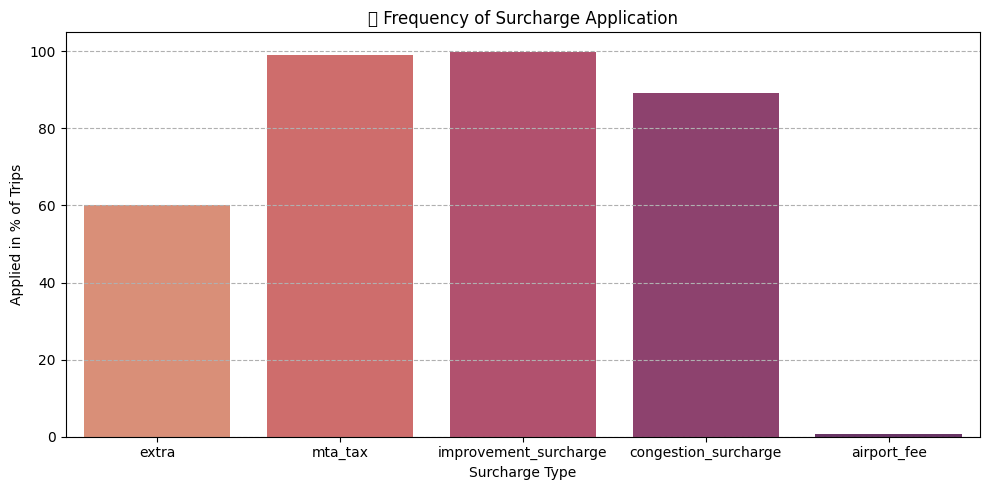

In [138]:
# How often is each surcharge applied?

# Count how often each surcharge > 0
surcharge_summary = {
    'extra': (df['extra'] > 0).sum(),
    'mta_tax': (df['mta_tax'] > 0).sum(),
    'improvement_surcharge': (df['improvement_surcharge'] > 0).sum(),
    'congestion_surcharge': (df['congestion_surcharge'] > 0).sum(),
    'airport_fee': (df['airport_fee'] > 0).sum()
}

# Convert to DataFrame
surcharge_freq = pd.DataFrame(list(surcharge_summary.items()), columns=['Surcharge', 'Applied_Count'])

# Add total rows for percentage calculation
total_rows = len(df)
surcharge_freq['Applied_Percentage'] = (surcharge_freq['Applied_Count'] / total_rows * 100).round(2)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=surcharge_freq, x='Surcharge', y='Applied_Percentage', palette='flare')
plt.title("💰 Frequency of Surcharge Application")
plt.ylabel("Applied in % of Trips")
plt.xlabel("Surcharge Type")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# Prioritize fleet availability at airport and transit zones - Pickup/dropoff ratios show high outbound demand from JFK, LGA, and Penn Station, indicating a need to reposition idle cabs into these zones proactively.
# Avoid fleet idle time in low-return zones - Residential areas like Freshkills Park and Whitestone see mostly drop-offs with almost no pickups, leading to inefficient returns.
# Match driver count with commuter traffic during weekday mornings - Solo passenger rides peak between 8–10 AM, indicating commuter patterns where quick solo pickups dominate.
# Strengthen operations over weekends, especially Friday and Saturday nights - These days show maximum trip volume and revenue, particularly in entertainment-focused neighborhoods.
# Encourage longer trips to drive up tip percentage - Tip percentage rises notably for trips longer than 5 miles, likely due to higher engagement or perceived value.
# Avoid congestion zones during low demand to reduce customer cost - Congestion surcharges are applied heavily in Manhattan, especially during work hours.
# Plan route dispatches to avoid repeated surcharge areas when possible - Airport and congestion surcharges occur predictably; optimizing paths around them can reduce ride abandonment.
# Use pickup/dropoff ratio to reposition idle vehicles - Zones like East Elmhurst have 8x more pickups than drop-offs, suggesting a need to route idle taxis back here.
# Assign driver shifts based on peak demand patterns - Time-based trends clearly show when and where customer demand surges, enabling smarter shift design.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# 1. Airports (JFK, LGA) — Always Keep Cabs Nearby
# - These zones have many more pickups than drop-offs.
# - Keep some cabs always available near JFK and LaGuardia, even during mid-day or late-night hours.

# 2. Nightlife Zones (East Village, West Village, Midtown) — High Demand in Evenings
# - Peak demand and higher tips between 6 PM to 2 AM, especially on Friday to Sunday.
# - Position cabs near bars, clubs, and popular food areas during evenings.

# 3. Work Hubs (Penn Station, Midtown East) — Morning Commute Focus
# - Weekday mornings (7 AM to 10 AM) have many solo rides.
# - Use more solo cabs here during these hours to meet fast-moving commuter demand.

# 4. Weekend Nights (Times Square, LES, Meatpacking) — Boost Coverage
# - Friday and Saturday nights see many short trips with surcharges.
# - Keep extra cabs nearby (not directly in hotspots to avoid congestion) and rotate them in when others finish trips.

# 5. High Fare/Tip Zones — Priority Areas
# - Places like East Chelsea and Murray Hill give better fare per mile and higher tip percentages.
# - Send idle cabs to these areas during off-peak hours.

# 6. Busy Seasons (April–June, Oct–Dec) — Increase Fleet
# - Q2 and Q4 show higher trip revenue.
# - Add more cabs especially near hotels, parks, and tourist areas during these months.

# 7. Use Pickup/Dropoff Ratios
# - Some zones like East Elmhurst have 8x more pickups than drop-offs.
# - Monitor and return cabs back into such zones using trip ratio tracking.

# 8. Avoid Congestion Zones Midday (if demand is low)
# - Midtown has high congestion surcharges but not always higher fares.
# - Between 11 AM to 2 PM, shift cabs to SoHo, UES, or Brooklyn zones.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
1. Implement Distance-Based Dynamic Pricing Tiers
- Insight: Fare per mile is higher for trips under 2 miles due to base fare dominance.
- Strategy: Introduce micro-distance fare tiers:
  - $1.5-$2 additional fee for <2 mile trips in high-demand zones during peak hours.
  - Reduced per-mile rate after 5 miles to incentivize longer trips.

2. Add Time-of-Day Based Surcharges (Beyond "extra")
- Insight: Peak tip and fare rates occur during 6-9 PM and late nights.
- Strategy:
  - Introduce a small evening peak surcharge ($1) from 6 PM to 9 PM.
  - Keep night surcharge but increase it by 25% only in high-demand nightlife zones.

3. Offer Incentives for Off-Peak Rides
- Insight: Midday trips (11 AM-3 PM) and early mornings are low volume.
- Strategy:
  - Apply a 10-15% discount or loyalty points on rides during off-peak hours.
  - Partner with employers or hotels for group/shared rides with lower fare slabs.

4. Zone-Specific Surcharge Policies
- Insight: Congestion surcharge hits riders in Midtown but doesn't always result in higher total fares.
- Strategy:
  - Use zone congestion indexing to apply surcharges only when congestion exceeds thresholds (e.g., >30 mins avg trip time).

5. Leverage Tip Behavior for Suggested Fare Boosting
- Insight: Tip percentage is higher for long trips and evening/night hours.
- Strategy:
  - Show “suggested tipping fares” for long trips on the app.
  - Allow riders to round up for “priority dispatch,” improving tips and reducing wait times.

6. Encourage Card Payments with Digital Discounts
- Insight: Most tips are logged on card transactions; cash tips are often 0.
- Strategy:
  - Offer $0.50 off fare for digital payments above $15.
  - Highlight “frequent tipper” badges or rewards for app-based users.

7. Competitor-Aware Fare Floor
- Insight: Vendor 1 and Vendor 2 show different fare efficiencies.
- Strategy:
  - Benchmark weekly average fare/mile against Uber/Lyft public data or sample trips.
  - Adjust base fare monthly within a ±5% buffer to maintain competitiveness.

8. Revenue Predictive Modelling
- Insight: Fare per mile and tip % are predictable based on zone + time + passenger count.
- Strategy:
  - Use a regression model to recommend optimal fares per zone + time window.
  - Apply real-time price adjustments using 15-minute data windows.
